In [1]:
import numpy as np
import sys
import ipdb

sys.path.append("../")

sys.path.append("../utils/")
from utils_functions import *

from dd_game import *
from two_stage_player import *

# Configurations

In [2]:
#TODO: There are many configuration parameters here. It is important to understand the effect of all.
d = 2
coeff_var = 1

Sigma_x_p1 = np.eye(d)
Sigma_x_p2 = np.eye(d)

sigma_y_p1 = 0
sigma_y_p2 = 0

beta_p1 = np.random.normal(size = d)
beta_p2 = np.random.normal(size = d)

mu_p1 = np.random.normal(scale = coeff_var, size = d)
mu_p2 = np.random.normal(scale = coeff_var, size = d)
gamma_p1 = np.random.normal(scale = coeff_var, size = d)
gamma_p2 = np.random.normal(scale = coeff_var, size = d)

#Fixing mu and gamma for testing purposes
if False:
    mu_p2 = np.array([2.1, -1.8])
    gamma_p2 = np.array([1.2, 0.9])
    mu_p1 = np.array([-2.8, 2.2])
    gamma_p1 = np.array([0.7, -0.3])

if False:
    mu_p1 = np.array([0, 0])
    gamma_p1 = np.array([1, 1])
    mu_p2 = np.array([0, 0])
    gamma_p2 = np.array([1, 1])

In [3]:
p1_data_params = (Sigma_x_p1, sigma_y_p1, beta_p1, mu_p1, gamma_p1)
p1_data_generating_func = sample_from_location_family

p2_data_params = (Sigma_x_p2, sigma_y_p2, beta_p2, mu_p2, gamma_p2)
p2_data_generating_func = sample_from_location_family

In [4]:
num_rounds_lst = [10, 100, 1000, 10000, 40000, 100000]
num_alternate_rounds = 50
num_test = 10000

# Run Game

In [5]:
#Initialize game with configurations specified above
p1_risks = []
p2_risks = []
theta_final_p1 = []
theta_final_p2 = []


for num_rounds in num_rounds_lst:
    player_two = TwoStagePlayer()
    player_one = TwoStagePlayer()
    game = DecisionDependentGame(player_one, player_two, p1_data_params, p2_data_params, 
                             p1_data_generating_func, p2_data_generating_func, 
                             num_rounds, num_alternate_rounds, num_test)
    
    game.run_train()
    game.run_post_train_alternating()
    
    p1_risks.append(game.evaluate_test_perf_risk_p1())
    p2_risks.append(game.evaluate_test_perf_risk_p2())
    
    theta_final_p1.append(game.theta_p1)
    theta_final_p2.append(game.theta_p2)
    
    #Change this flag if one wants to change print settings
    if True:
        print("---------------------")
        print("Player 1: Actual mu, gamma")
        print(mu_p1, gamma_p1)
        print("Player 1: Estimated mu, gamma")
        print(player_one.mu_hat, player_one.gamma_hat)

        print("Player 2: Actual mu, gamma")
        print(mu_p2, gamma_p2)
        print("Player 2: Estimated mu, gamma")
        print(player_two.mu_hat, player_two.gamma_hat)

Stage 1 finished. Performing estimation now
Stage 1 finished. Performing estimation now
Stage 2 finished. Finding qs now.
Stage 2 finished. Finding qs now.
---------------------
Player 1: Actual mu, gamma
[0.10998245 0.04461608] [-1.00895734 -0.54030545]
Player 1: Estimated mu, gamma
[-0.69379525  0.41044979] [-0.70036129 -0.29070166]
Player 2: Actual mu, gamma
[-1.72847434 -0.72348119] [-0.78221515  1.71277075]
Player 2: Estimated mu, gamma
[-1.17982905 -1.51027857] [-1.53834934  2.52988789]
Stage 1 finished. Performing estimation now
Stage 1 finished. Performing estimation now
Stage 2 finished. Finding qs now.
Stage 2 finished. Finding qs now.
---------------------
Player 1: Actual mu, gamma
[0.10998245 0.04461608] [-1.00895734 -0.54030545]
Player 1: Estimated mu, gamma
[-0.06836565  0.02585363] [-1.25372777 -0.37350552]
Player 2: Actual mu, gamma
[-1.72847434 -0.72348119] [-0.78221515  1.71277075]
Player 2: Estimated mu, gamma
[-2.16086059 -1.04502143] [-0.5947943   1.57396603]
Stag

In [18]:
theta_PO_1, theta_PO_2 = game.solve_nash()
theta_PO_1

array([-1.55549707, -1.19502689])

In [19]:
theta_final_p1 = np.array(theta_final_p1)
theta_final_p2 = np.array(theta_final_p2)
theta_final_p1

array([[-1.38089222, -1.62118096],
       [-1.5430414 , -1.15260555],
       [-1.61761873, -1.19377918],
       [-1.55769044, -1.18956559],
       [-1.56664073, -1.23464899],
       [-1.55458071, -1.2034036 ]])

In [8]:
p1_risks

[0.6278316488755095,
 0.10970378994272496,
 0.7047249438782992,
 0.47167903226399166,
 0.5794938019530695,
 0.531142896032001]

In [9]:
p2_risks

[1.1538215562616998,
 1.5125370231175934,
 1.1231052149292,
 1.0241970387997137,
 0.9439253548755357,
 0.9783020485365809]

In [10]:
if False:
    print(mu_p1, gamma_p1)
    print(player_one.mu_hat.round(2), player_one.gamma_hat.round(2))

    print(mu_p2, gamma_p2)
    print(player_two.mu_hat.round(2), player_two.gamma_hat.round(2))

    print(game.solve_nash())
    print(game.solve_social_opt())
    
    print(game.evaluate_test_perf_risk_p1().round(3))
    print(game.evaluate_test_perf_risk_p2().round(3))

## Plots

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

Text(0.5, 1.0, 'Params learned after stage 2 with n points')

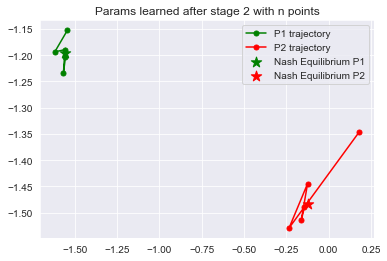

In [13]:
x_nash_p1 = [theta_PO_1[0]]
y_nash_p1 = [theta_PO_1[1]]
plt.scatter(x_nash_p1, y_nash_p1, label = 'Nash Equilibrium P1', marker = '*', color = 'g', s = 120)

x_nash_p2 = theta_PO_2[0]
y_nash_p2 = theta_PO_2[1]
plt.scatter(x_nash_p2,y_nash_p2, label = 'Nash Equilibrium P2', marker = '*', color = 'r', s = 120)

x2 = theta_final_p1[:, 0]
y2 = theta_final_p1[:, 1]
plt.plot(x2[1:],y2[1:], label = 'P1 trajectory', marker = 'o', color = 'g', markersize = 5)

x3 = theta_final_p2[:, 0]
y3 = theta_final_p2[:, 1]
plt.plot(x3[1:],y3[1:], label = 'P2 trajectory', marker = 'o', color = 'r', markersize = 5)

plt.legend()
plt.title("Params learned after stage 2 with n points")

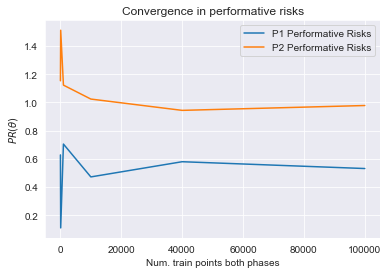

In [14]:
plt.plot(num_rounds_lst, p1_risks, label ='P1 Performative Risks')
plt.plot(num_rounds_lst, p2_risks, label ='P2 Performative Risks')

plt.xlabel("Num. train points both phases")
plt.ylabel(r"$PR(\theta)$")
plt.title("Convergence in performative risks")

plt.legend()

## Checking stage 1

In [15]:
print(player_one.mu_hat, player_one.gamma_hat)
print(player_two.mu_hat, player_two.gamma_hat)

[0.10911051 0.05684957] [-1.00443587 -0.54203387]
[-1.73281157 -0.72768238] [-0.7759147  1.7227125]


In [16]:
print(mu_p1, gamma_p1)
print(mu_p2, gamma_p2)

[0.10998245 0.04461608] [-1.00895734 -0.54030545]
[-1.72847434 -0.72348119] [-0.78221515  1.71277075]


## Evaluate the performative risks before and after Stage 3

In [17]:
a

NameError: name 'a' is not defined

In [ ]:
PR_1 = game.evaluate_test_perf_risk_p1()
PR_2 = game.evaluate_test_perf_risk_p2()
print(f'Player 1 PR = {PR_1.round(3)}\tPlayer 2 PR = {PR_2.round(3)}')

In [ ]:
print(player_one.theta_history[-1])
print(player_two.theta_history[-1])

In [ ]:
game.theta_p1, game.theta_p2 = game.solve_nash()
PO_1 = game.evaluate_test_perf_risk_p1()
PO_2 = game.evaluate_test_perf_risk_p2()
print(f'Player 1 PO = {PO_1.round(3)}\tPlayer 2 PO = {PO_2.round(3)}')

In [ ]:
game.theta_p1, game.theta_p2 = game.solve_social_opt()
SO_1 = game.evaluate_test_perf_risk_p1()
SO_2 = game.evaluate_test_perf_risk_p2()
print(f'Player 1 SO = {SO_1.round(3)}\tPlayer 2 SO = {SO_2.round(3)}')